In [1]:
import decaylanguage as dl
import pandas as pd

In [2]:
exp = "BELLE2"  # Can be BELLE or BELLE2

parser = dl.DecFileParser((f"../src/decaylanguage/data/DECAY_{exp}.DEC"))

parser.parse()

In [3]:
names_to_look = {
    "ep": ["e+"],
    "mup": ["mu+"],
    "Km": ["K-"],
    "Kp": ["K+"],
    "Kz": ["K0", "anti-K0", "K_S0", "K_L0"],
    "Kstarm": ["K*-"],
    "Kstarp": ["K*+"],
    "Kstarzb": ["anti-K*0"],
    "Kstarz": ["K*0"],
}

In [4]:
# Include other aliases defined in the DEC file

for name in names_to_look.items():
    for alias in parser.dict_aliases().items():
        if any([n in alias[1] for n in name[1]]):
            names_to_look[name[0]].append(alias[0])

print(f"Now including all the aliases: \n{names_to_look=}")

Now including all the aliases: 
names_to_look={'ep': ['e+'], 'mup': ['mu+'], 'Km': ['K-'], 'Kp': ['K+'], 'Kz': ['K0', 'anti-K0', 'K_S0', 'K_L0'], 'Kstarm': ['K*-', 'K*-R'], 'Kstarp': ['K*+', 'K*+R'], 'Kstarzb': ['anti-K*0', 'K*BL', 'K*BS', 'anti-K*0T', 'K*BR'], 'Kstarz': ['K*0', 'K*L', 'K*S', 'K*BL', 'K*BS', 'K*0T', 'anti-K*0T', 'K*BR', 'K*0R']}


In [5]:
mothers = ["D+", "D0", "D_s+"]

In [6]:
for m in mothers:
    for i in names_to_look.keys():
        print(f"{m} --> {i}")
        D_inc = parser.build_decay_chains_to_inclusive_fsp(
            mother=m, fsp=names_to_look[i]
        )
        img = dl.DecayChainViewer(D_inc)

D+ --> ep
Total BF shown: 17.83%
D+ --> mup
Total BF shown: 17.84%
D+ --> Km
Total BF shown: 27.66%
D+ --> Kp
Total BF shown: 5.60%
D+ --> Kz
Total BF shown: 59.35%
D+ --> Kstarm
Total BF shown: 2.71%
D+ --> Kstarp
Total BF shown: 1.96%
D+ --> Kstarzb
Total BF shown: 19.27%
D+ --> Kstarz
Total BF shown: 0.20%
D0 --> ep
Total BF shown: 7.75%
D0 --> mup
Total BF shown: 8.24%
D0 --> Km
Total BF shown: 55.82%
D0 --> Kp
Total BF shown: 3.36%
D0 --> Kz
Total BF shown: 40.01%
D0 --> Kstarm
Total BF shown: 12.08%
D0 --> Kstarp
Total BF shown: 0.47%
D0 --> Kstarzb
Total BF shown: 9.38%
D0 --> Kstarz
Total BF shown: 0.83%
D_s+ --> ep
Total BF shown: 7.96%
D_s+ --> mup
Total BF shown: 8.81%
D_s+ --> Km
Total BF shown: 17.86%
D_s+ --> Kp
Total BF shown: 25.77%
D_s+ --> Kz
Total BF shown: 23.69%
D_s+ --> Kstarm
Total BF shown: 0.00%
D_s+ --> Kstarp
Total BF shown: 13.07%
D_s+ --> Kstarzb
Total BF shown: 7.61%
D_s+ --> Kstarz
Total BF shown: 2.42%


In [7]:
D_inc = parser.build_decay_chains_to_inclusive_fsp(
    mother="D0", fsp=names_to_look["Kstarp"]
)
img = dl.DecayChainViewer(D_inc)

Total BF shown: 0.47%


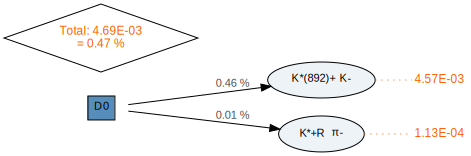

In [8]:
img

In [9]:
D_inc = parser.build_decay_chains_to_inclusive_fsp(
    mother="D0", fsp=names_to_look["Kp"]
)
df = dl.DecayChainToTable(D_inc).table
df.sort_values(by='BF', ascending=False)

Total BF tabulated: 3.36%


,Decay,BF
5,D0 --> K_S0 K+ K-,4.420000e-03
6,D0 --> K_L0 K+ K-,4.420000e-03
17,D0 --> K+ K-,4.080000e-03
31,D0 --> K+ K- pi+ pi- pi0,3.100000e-03
30,D0 --> K+ K- pi0 pi0,2.761000e-03
0,D0 --> a_1+ K- ∮ a_1+ --> K+ K0 pi0,1.950000e-03
29,D0 --> K+ K- pi+ pi-,1.730000e-03
23,D0 --> K*- K+,1.625000e-03
21,D0 --> K*+ K- ∮ K*+ --> K+ pi0,1.523157e-03
26,D0 --> K_L0 K+ pi-,1.518000e-03
